In [1]:
import numpy as np
import spec_flats as sf

## Initialize butler and set up observation year to find flats 

In [2]:
repo = '/repo/embargo'
calibCollections=['LATISS/calib/legacy','LATISS/raw/all']
obs_year = 2024
filter = 'SDSSg_65mm'
disperser = 'empty'

In [3]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=obs_year,filter=filter,disperser=disperser,repo=repo,calibCollections=calibCollections)

In [4]:
flat_dates

array([20240129, 20240131, 20240201, 20240207, 20240212, 20240216,
       20240219, 20240220, 20240221, 20240222, 20240223, 20240226,
       20240227, 20240228, 20240301, 20240303, 20240305, 20240306,
       20240308, 20240311, 20240326, 20240327, 20240328, 20240329,
       20240401, 20240402, 20240403, 20240404, 20240408, 20240409,
       20240410, 20240415, 20240416, 20240417, 20240419, 20240422,
       20240423, 20240424, 20240429, 20240524, 20240527, 20240528,
       20240529, 20240530, 20240603, 20240611, 20240618, 20240619,
       20240624, 20240625, 20240626, 20240627, 20240703, 20240708,
       20240709, 20240716, 20240717, 20240722, 20240723, 20240724,
       20240726, 20240729, 20240730, 20240801, 20240806, 20240807])

In [8]:
#flat_ids

### Find closest date 

In [9]:
closest_date, closest_ids = sf.find_closest_date(20250108,flat_ids)

Requested observation date =  20250108
Closest date available =  20240807
Corresponding flat IDs =  [2024080700146 2024080700147 2024080700148 2024080700149 2024080700150
 2024080700151 2024080700152 2024080700153 2024080700154 2024080700155
 2024080700156 2024080700157 2024080700158 2024080700159 2024080700160
 2024080700161 2024080700162 2024080700163 2024080700164 2024080700165
 2024080700166]


### Check that the flats of a given date can be loaded 

In [15]:
sf.check_flats(closest_ids,return_flats=False,butler=butler,calibCollections=calibCollections)

Inspecting flats
All flats are equal


### Select a flat by ID and plot it 

In [16]:
flat_id0 = 2025010800087

In [17]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2025010800087 properly loaded


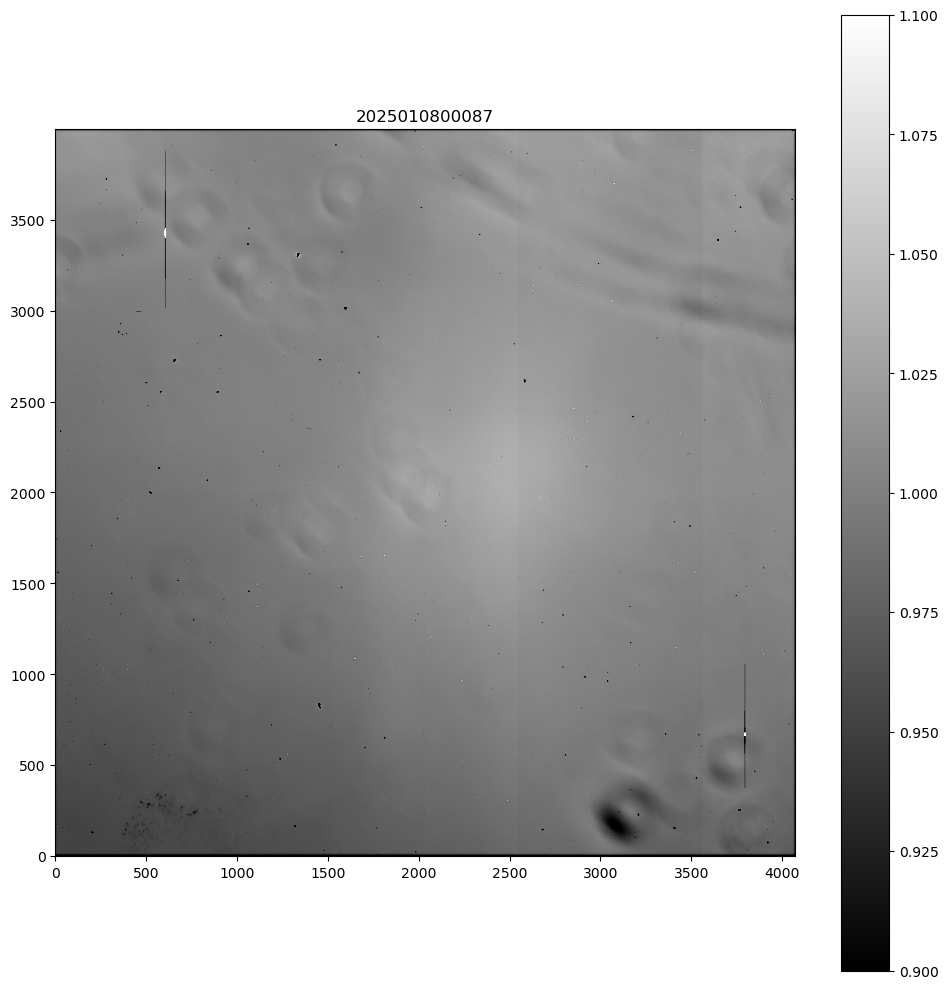

In [18]:
sf.plot_flat(flat_array_,title=flat_id0)

## Now we use the auxtel_flat class 

### We create an auxtel_flat object for a given flat ID 
We can reuse the butler that we initialized above or set up a different one 

In [19]:
myflat = sf.auxtel_flat(flat_id0,butler=butler)

In [20]:
myflat.flat_array

array([[0.53261137, 0.5218164 , 0.51592493, ..., 0.53400564, 0.5375086 ,
        0.5509224 ],
       [0.68747383, 0.6848589 , 0.6835276 , ..., 0.6884202 , 0.69494134,
        0.6908289 ],
       [0.74667263, 0.7571097 , 0.75711197, ..., 0.7621511 , 0.7725817 ,
        0.7493886 ],
       ...,
       [0.80247664, 0.80738056, 0.8149901 , ..., 0.8246341 , 0.8053092 ,
        0.79714435],
       [0.7303134 , 0.73359483, 0.7336715 , ..., 0.74042547, 0.74627215,
        0.73548347],
       [0.5757691 , 0.566827  , 0.5558483 , ..., 0.5701016 , 0.5729723 ,
        0.590216  ]], dtype=float32)

### Plot flat with plot_flat() method 

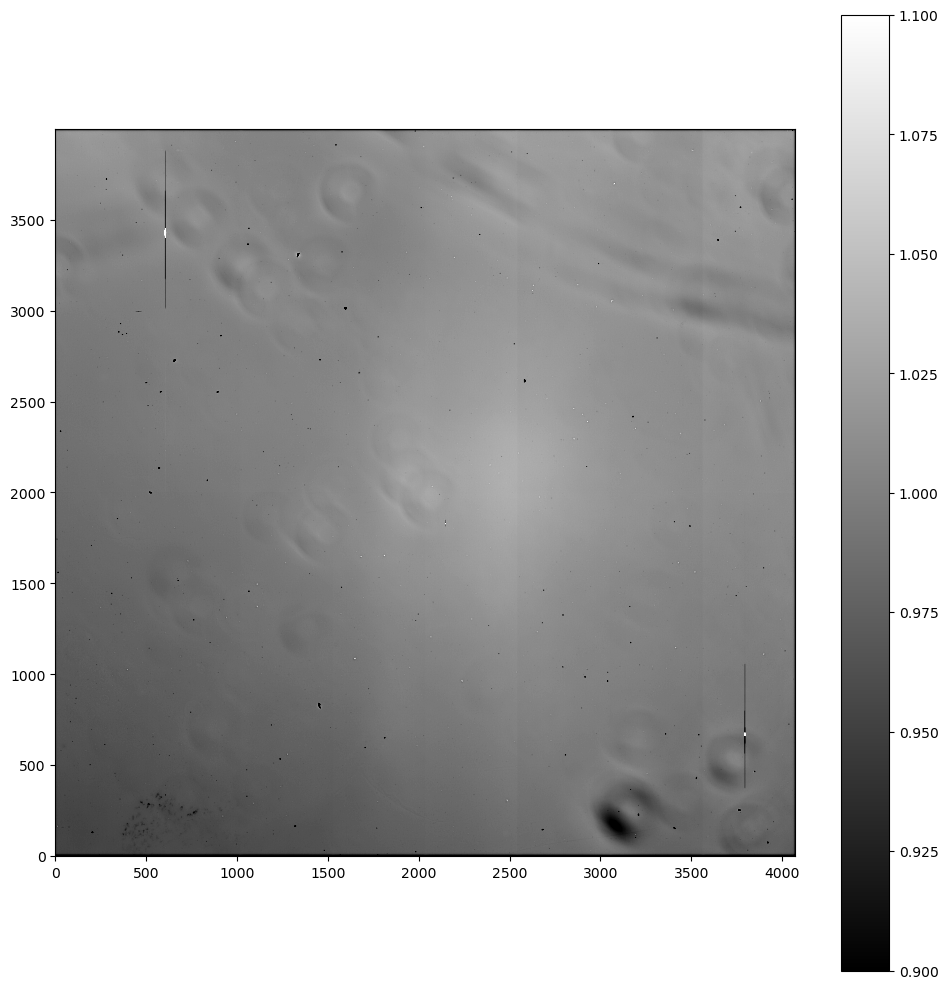

In [21]:
myflat.plot_flat()

### Check some atributes of the auxtel_flat object 

In [22]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [23]:
myflat.amplis_coords

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [24]:
myflat.amplis

array(['10', '11', '12', '13', '14', '15', '16', '17', '07', '06', '05',
       '04', '03', '02', '01', '00'], dtype='<U2')

### Now we select our implifiers of interest 

In [25]:
myflat.select_amplis(['C03','C13'])

In [26]:
myflat.amplis

['C03', 'C13']

In [27]:
myflat.amplis_coords

{'C03': (1527, 2036, 0, 2000), 'C13': (1527, 2036, 2000, 4000)}

In [28]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

### We create a reduced or *cut* version of the original flat 

In [29]:
myflat.cut_flat_array()

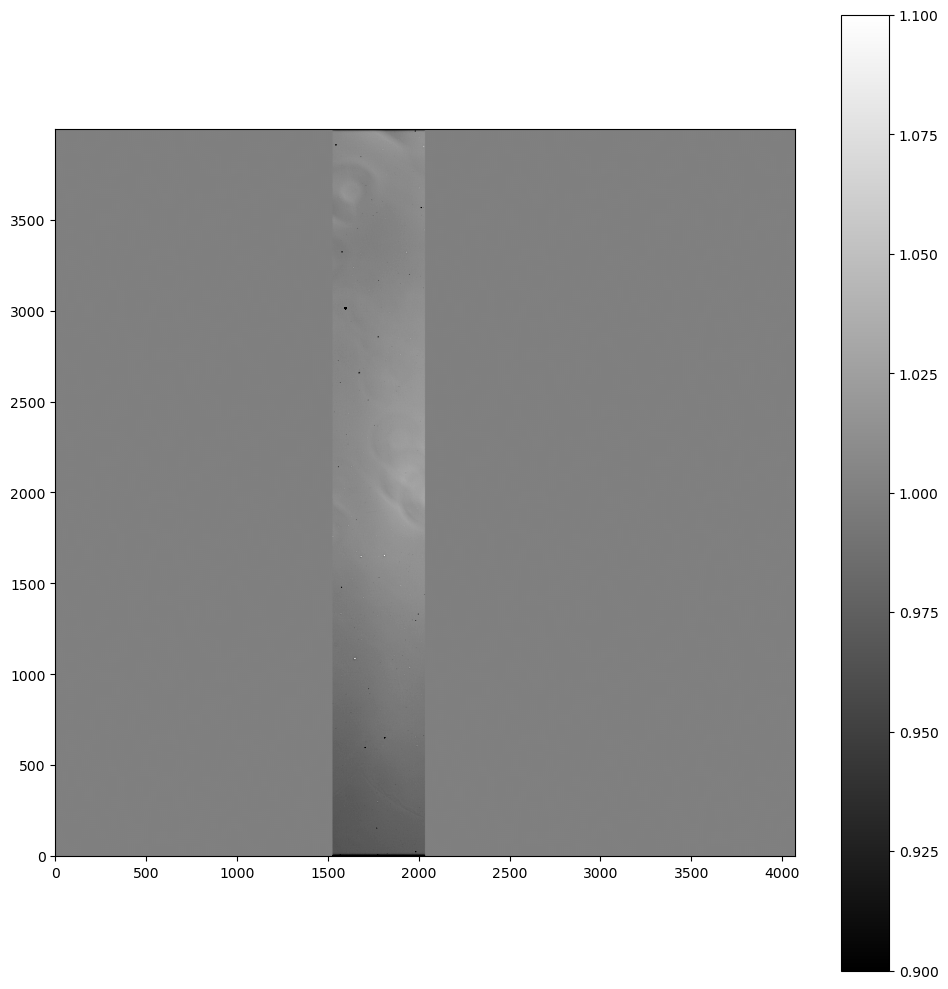

In [30]:
sf.plot_flat(myflat.cut_array)

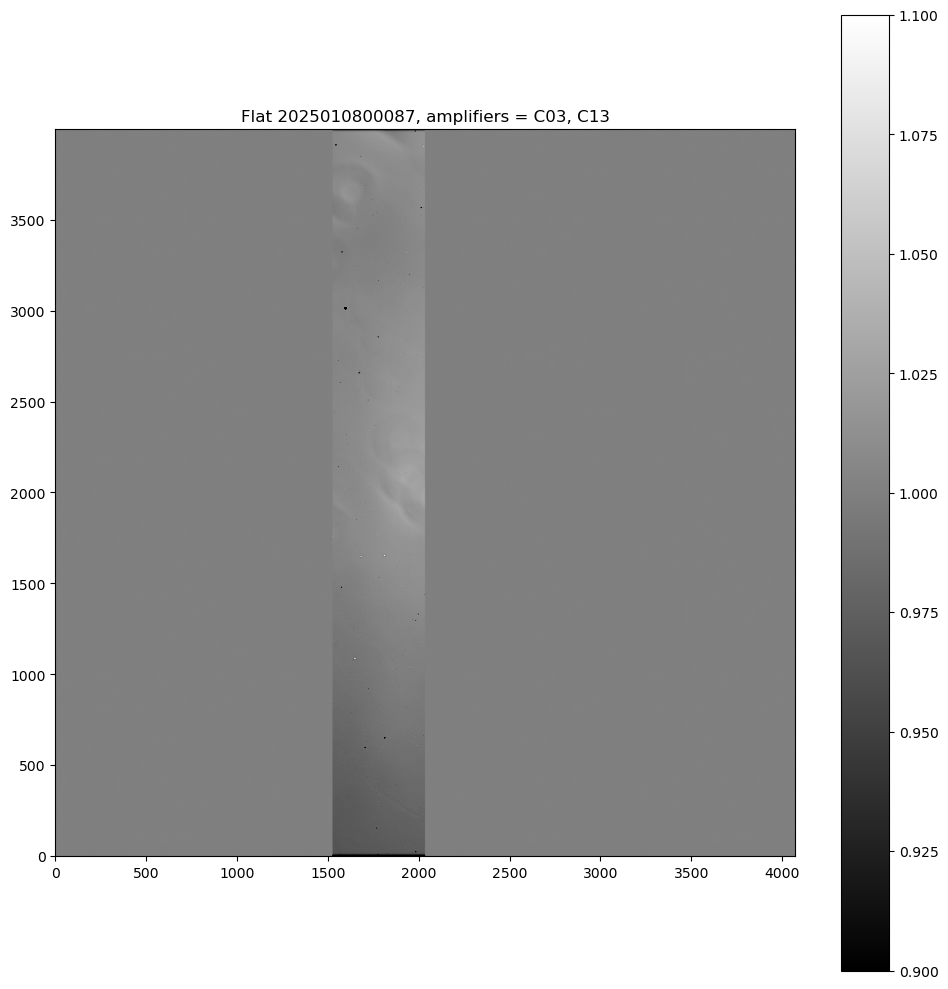

In [31]:
myflat.plot_flat(show='cut_flat')

### We can also normalize the flat 

Each amplifier is normalized by its median separately 

In [32]:
myflat.normalize_flat()

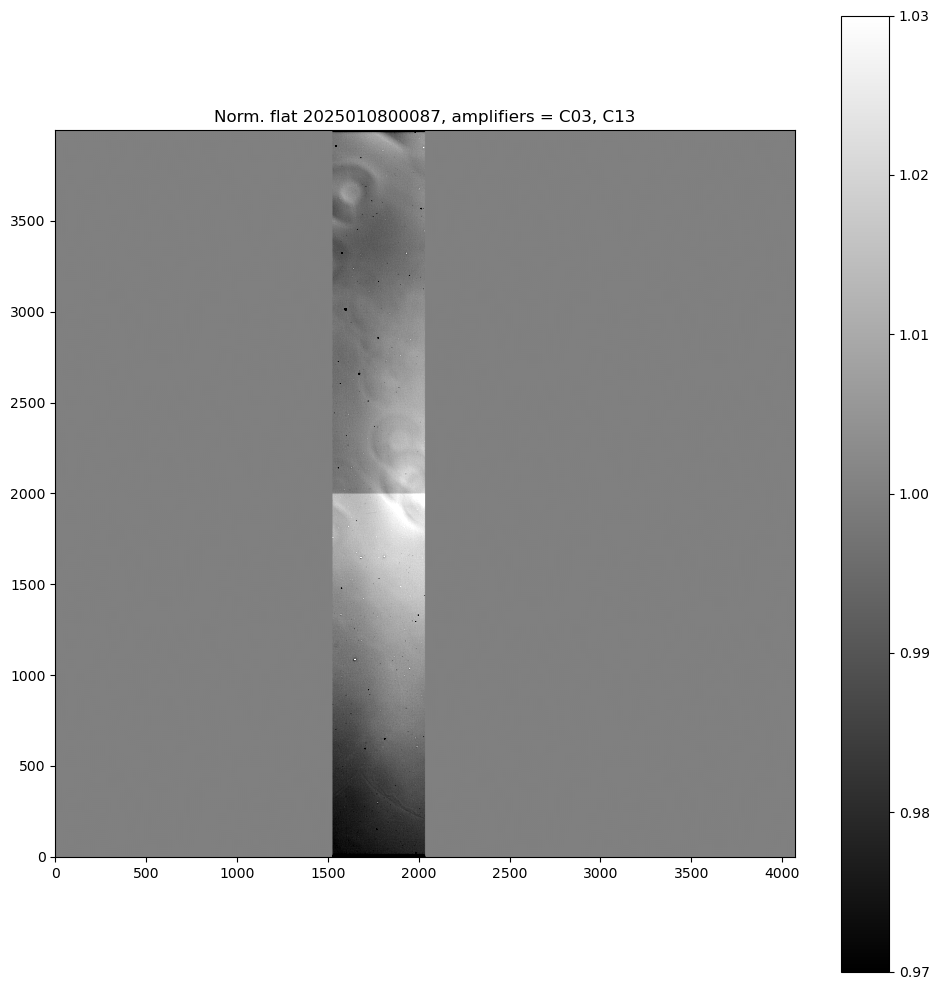

In [33]:
myflat.plot_flat(show="norm",vmin=0.97,vmax=1.03)

Some tests 

In [34]:
(myflat.cut_array==myflat.norm_array).all()

False

In [35]:
myflat.amplis_coords

{'C03': (1527, 2036, 0, 2000), 'C13': (1527, 2036, 2000, 4000)}

In [36]:
x0_ = myflat.amplis_coords['C03'][0]
x1_ = myflat.amplis_coords['C03'][1]
y0_ = myflat.amplis_coords['C03'][2]
y1_ = myflat.amplis_coords['C03'][3]
print(np.median(myflat.cut_array[y0_:y1_,x0_:x1_]))
print(np.median(myflat.norm_array[y0_:y1_,x0_:x1_]))

0.9940859973430634
0.9999999701976776


In [37]:
type(myflat.flat_img)

lsst.afw.image._exposure.ExposureF

### We can also create a smoothed flat 

This is independent of the normalizing step, that is, we can do it even if we haven't done myflat.normalize_flat(), it will be done internally by default (normalize = True, very fast operation) 

In [38]:
myflat.smooth_flat(window_size=40,mode='mirror')

Window size for mean smoothing = 40
Smoothing with mean filter
Masking outliers beyond 1.00 and 99.00 percentiles
Time for smoothing = 0.1112s


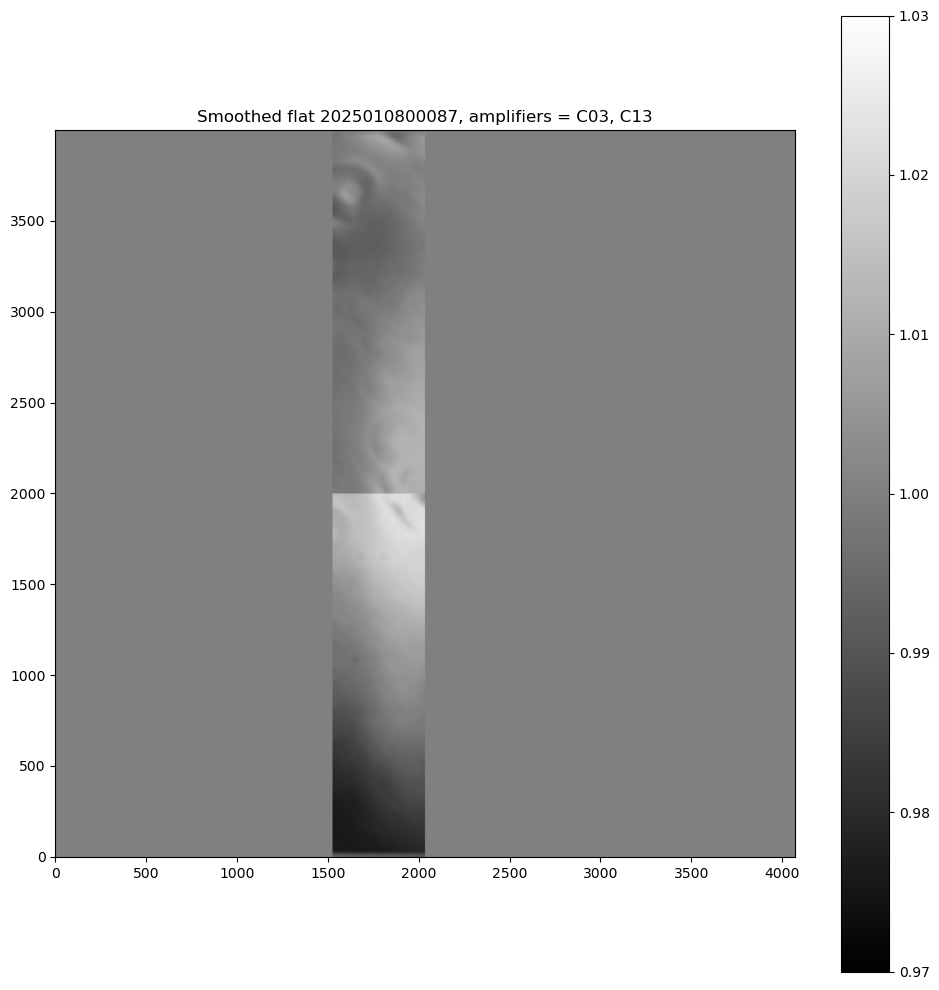

In [39]:
%matplotlib inline
myflat.plot_flat(show="smooth",vmin=0.97,vmax=1.03)

In [40]:
myflat.smooth_array

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [41]:
ws = [10,20,30,40,50]

In [42]:
'''
for ws_ in ws:
    myflat.smooth_flat(window_size=ws_)
    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)
'''

'\nfor ws_ in ws:\n    myflat.smooth_flat(window_size=ws_)\n    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)\n'

### Finally, we can create a spectroscopy or *special* flat 

This is also independent of the steps above: if myflat.smooth_array was not generated with myflat.smooth_flat, it will be done internally 

In [43]:
myflat.special_flat(window_size=40)

Window size for mean smoothing = 40
Smoothing with mean filter
Masking outliers beyond 1.00 and 99.00 percentiles
Time for smoothing = 0.1092s
Window size for mean smoothing = 40
Window size for mean smoothing = 40
Using previously created smooth array


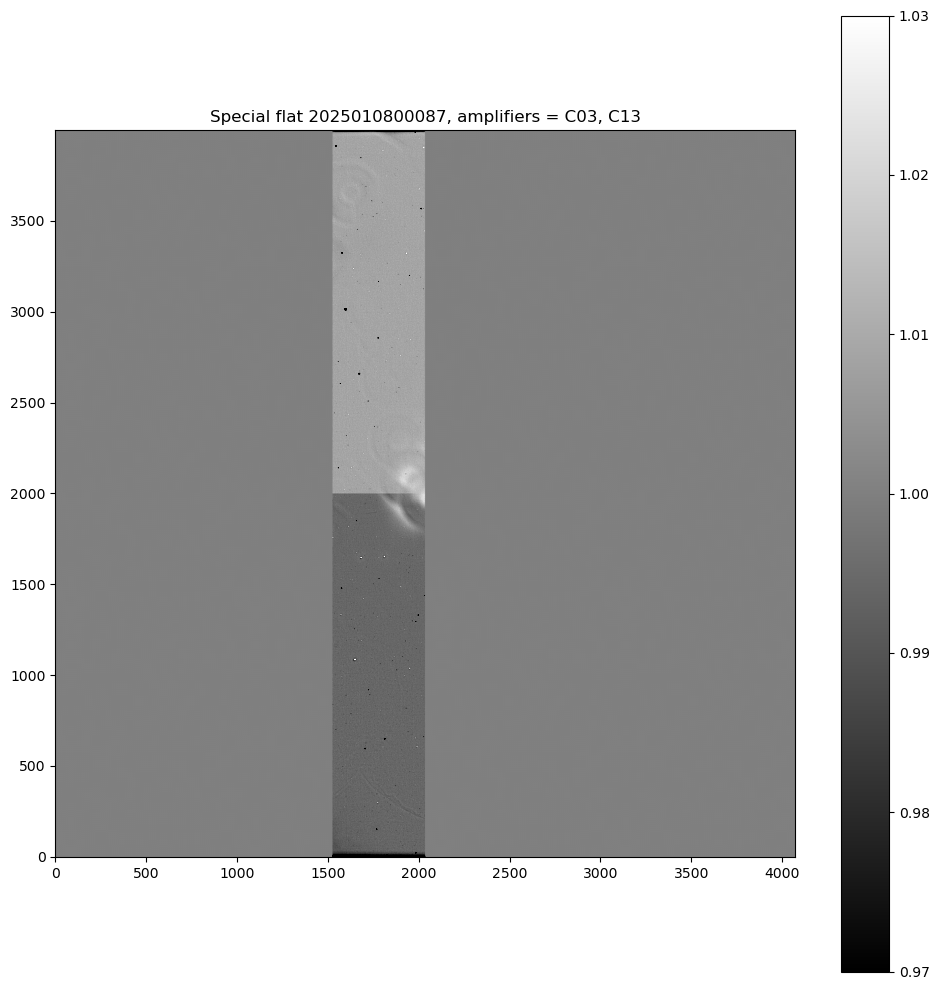

In [44]:
myflat.plot_flat(show="special",vmin=0.97,vmax=1.03)